In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kml-2024-s-final-exam/sample_submission.csv
/kaggle/input/kml-2024-s-final-exam/train.csv
/kaggle/input/kml-2024-s-final-exam/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 30)

In [3]:
train = pd.read_csv('/kaggle/input/kml-2024-s-final-exam/train.csv')
test = pd.read_csv('/kaggle/input/kml-2024-s-final-exam/test.csv')

In [4]:
train

,id,num01,num02,cat01,cat02,cat03,cat04,cat05,cat06,cat07,cat08,target
0,SID100109,0,70.0,6,67,18,326,NaN,1,2147745792,NaN,21
1,SID100255,35,NaN,2,49,24,263,9.0,1,790528,4.0,21
2,SID100284,0,60.0,0,105,23,1594,NaN,0,2147745792,NaN,19
3,SID100315,12,70.0,7,19,23,1590,NaN,0,2147745824,4.0,25
4,SID100374,0,70.0,3,24,34,1969,NaN,1,2048,NaN,19
...,...,...,...,...,...,...,...,...,...,...,...,...
16565,SID99558,0,80.0,9,17,29,1770,NaN,0,2147746304,NaN,17
16566,SID99611,0,70.0,2,7,18,2013,NaN,0,2147745792,NaN,21
16567,SID99741,0,70.0,2,49,23,97,21.0,0,2147753984,NaN,17
16568,SID99756,0,70.0,10,29,19,1844,NaN,1,262144,NaN,17


In [5]:
X_train = train.drop(columns=['id','target'])
y_train = train.target
X_test = test.drop(columns=['id'])
X = pd.concat([X_train,X_test])

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10)
X[['num02']] = imputer.fit_transform(X[['num02']])

In [7]:
X['cat05'].fillna(-9999, inplace=True)

In [8]:
X['cat08'].fillna(-9999, inplace=True)

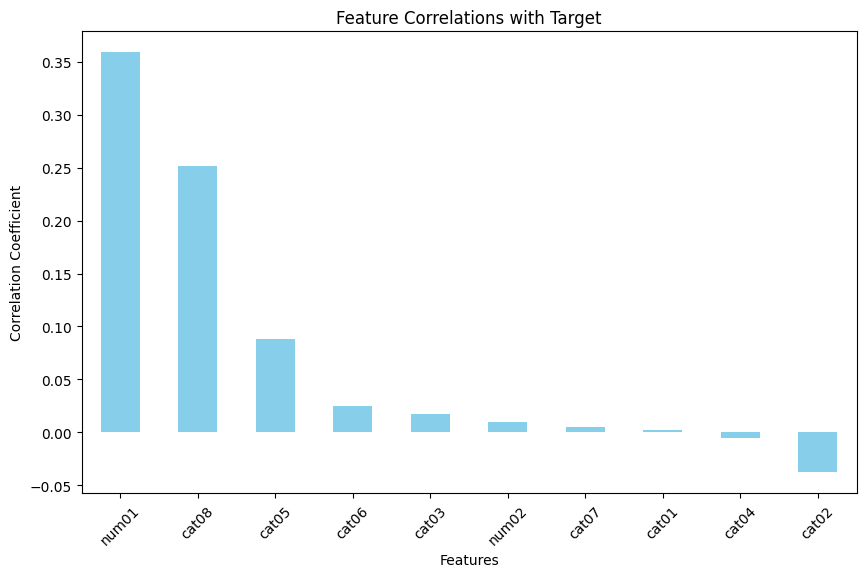

In [9]:
correlation_matrix = X.corrwith(y_train)
plt.figure(figsize=(10, 6))
correlation_matrix.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Correlations with Target')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [10]:
X['num01*num02']= X['num01']*X['num02']
X['num01+num02']=X['num01']+X['num02']
X['num01-num02']=X['num01']-X['num02']
X['num01*cat08']= X['num01']*X['cat08']
X['num01*cat05']= X['num01']*X['cat05']
X['num01*cat02']= X['num01']*X['cat02']

In [11]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat08'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [12]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat08'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [13]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat01'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [14]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat01'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [15]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat02'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [16]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat02'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [17]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat03'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [18]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat03'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [19]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat05'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [20]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat05'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [21]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat06'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [22]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat06'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [23]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat07'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [24]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat07'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [25]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat04'  # 범주형 feature의 이름
numeric_feature = 'num01'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [26]:
# 범주형 feature와 수치형 feature를 선택합니다.
categorical_feature = 'cat04'  # 범주형 feature의 이름
numeric_feature = 'num02'     # 수치형 feature의 이름

# 범주별로 수치형 feature의 평균을 계산합니다.
mean_by_category = X.groupby(categorical_feature)[numeric_feature].mean()
new_numeric_feature_name = f"Mean_{numeric_feature}_By_{categorical_feature}"
new = mean_by_category.reset_index().rename(columns={numeric_feature: new_numeric_feature_name})
X = X.merge(new, how='left', on=categorical_feature)

In [27]:
X['log_num01'] = np.log1p(X['num01'])

In [28]:
X.columns

Index(['num01', 'num02', 'cat01', 'cat02', 'cat03', 'cat04', 'cat05', 'cat06',
       'cat07', 'cat08', 'num01*num02', 'num01+num02', 'num01-num02',
       'num01*cat08', 'num01*cat05', 'num01*cat02', 'Mean_num01_By_cat08',
       'Mean_num02_By_cat08', 'Mean_num01_By_cat01', 'Mean_num02_By_cat01',
       'Mean_num01_By_cat02', 'Mean_num02_By_cat02', 'Mean_num01_By_cat03',
       'Mean_num02_By_cat03', 'Mean_num01_By_cat05', 'Mean_num02_By_cat05',
       'Mean_num01_By_cat06', 'Mean_num02_By_cat06', 'Mean_num01_By_cat07',
       'Mean_num02_By_cat07', 'Mean_num01_By_cat04', 'Mean_num02_By_cat04',
       'log_num01'],
      dtype='object')

In [29]:
con = ['num01', 'num02', 'cat04', 'num01*num02', 'num01+num02', 'num01-num02',
       'num01*cat08', 'num01*cat05', 'num01*cat02', 'Mean_num01_By_cat08',
       'Mean_num02_By_cat08', 'Mean_num01_By_cat01', 'Mean_num02_By_cat01',
       'Mean_num01_By_cat02', 'Mean_num02_By_cat02', 'Mean_num01_By_cat03',
       'Mean_num02_By_cat03', 'Mean_num01_By_cat05', 'Mean_num02_By_cat05',
       'Mean_num01_By_cat06', 'Mean_num02_By_cat06', 'Mean_num01_By_cat07',
       'Mean_num02_By_cat07', 'log_num01', 'Mean_num01_By_cat04',
       'Mean_num02_By_cat04']

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[con] = scaler.fit(X[con]).transform(X[con])

In [31]:
num_train = len(X_train)
X_train = X[:num_train]
X_test = X[num_train:]

In [32]:
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingRegressor

In [33]:
xgb = XGBRegressor(**{'n_estimators': 343, 'max_depth': 5, 'learning_rate': 0.03923322635827775, 'min_child_weight': 10, 'subsample': 0.8359556052315522, 'colsample_bytree': 0.7916273144992284, 'gamma': 3.4604144824790017, 'reg_alpha': 0.0005195098328849087, 'reg_lambda': 0.0001148934091628259})
score = cross_val_score(xgb, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
score.mean() *-1

8.611937625481833

In [34]:
cb = CatBoostRegressor()

In [35]:
from sklearn.linear_model import Ridge
stacking_rg = StackingRegressor(
    estimators=[('xgb', xgb), ('cb', cb)],
    final_estimator=Ridge()
)
stacking_rg.fit(X_train, y_train)

Learning rate set to 0.063802
0:	learn: 11.9561678	total: 60.2ms	remaining: 1m
1:	learn: 11.6552525	total: 66.1ms	remaining: 33s
2:	learn: 11.3854383	total: 71.6ms	remaining: 23.8s
3:	learn: 11.1430471	total: 76.9ms	remaining: 19.1s
4:	learn: 10.9266396	total: 82ms	remaining: 16.3s
5:	learn: 10.7248589	total: 87.5ms	remaining: 14.5s
6:	learn: 10.5406778	total: 93.4ms	remaining: 13.2s
7:	learn: 10.3670914	total: 98.9ms	remaining: 12.3s
8:	learn: 10.2160768	total: 105ms	remaining: 11.5s
9:	learn: 10.0829757	total: 110ms	remaining: 10.9s
10:	learn: 9.9620723	total: 116ms	remaining: 10.4s
11:	learn: 9.8461531	total: 121ms	remaining: 9.96s
12:	learn: 9.7418057	total: 127ms	remaining: 9.63s
13:	learn: 9.6493776	total: 132ms	remaining: 9.32s
14:	learn: 9.5684227	total: 138ms	remaining: 9.06s
15:	learn: 9.4932515	total: 143ms	remaining: 8.82s
16:	learn: 9.4200517	total: 149ms	remaining: 8.62s
17:	learn: 9.3603325	total: 155ms	remaining: 8.45s
18:	learn: 9.3083418	total: 161ms	remaining: 8.29s


StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7916273144992284,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=3.4604144824790017,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_...
                                            learning_rate=0.03923322635827775,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=10, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=343, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('cb',
                               <catboost.core.CatBoostRegressor object at 0x791f9d36db10>)],
                  final_estimator=Ridge())

In [36]:
stacking_pred=stacking_rg.predict(X_test)

In [37]:
pd.DataFrame({'id': test.id, 'target': stacking_pred}).to_csv('stacking_pred.csv', index=False)